# 5. Clock Pendulum with Air Drag and Joint Friction

This notebook builds on the previous one by introducing both a nonlinear pendulum and a nonlinear damping effect through [Coulomb friction](https://en.wikipedia.org/wiki/Friction#Dry_friction). Students will be able to work with both a linear and nonlinear version of the same system (a clock pendulum) in order to compare the free response in both cases.

After the completion of this assignment students will be able to:

- compute the free response of a non-linear compound pendulum
- estimate the period of oscillation of a nonlinear system
- compute the free response of a non-linear compound pendulum with Coulomb damping
- compare the non-linear behavior to the linear behavior
- identify the function that governs the decay envelope for Coulomb damping

![](fig/05/coulomb-pendulum.png)

A common source of damping and energy dissipation is friction, which is a specific type of damping. With viscous damping, we had a torque that was linearly proportional to the angular velocity:

$$T_f = c l^2 \dot{\theta}$$

This simple source of energy dissipation is a reasonable mathematical model for many phenomena, but it isn't often a good model for dry friction between to hard materials. One very useful model of friction is [Coulomb friction](https://en.wikipedia.org/wiki/Coulomb_damping). Coulomb friction behaves more like:

$$T_f = \begin{cases} -\frac{2}{3}\mu R F_N & \dot{\theta} > 0 \\ 0 & \dot{\theta} = 0 \\ \frac{2}{3}\mu R F_N & \dot{\theta} < 0 \end{cases}$$

where $\mu$ is a coefficient of sliding friction, $R$ is the outer radius of the joint contact (assuming disc/disc contact, see http://www.iitg.ernet.in/kd/Lecture%20Notes/ME101-Lecture15-KD_DivI.pdf for an explanation), and $F_N$ is the normal force in the pivot joint. Here the damping torque is constant, always impeding the motion of the system.

This can also be more simply written using the [signum function](https://en.wikipedia.org/wiki/Sign_function):

$$ T_f = -\frac{2}{3}\mu R F_n \text{sgn}\left( \dot{\theta} \right)$$

To start import some of the common packages we will need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Linear vs Nonlinear

`resonance` has both a version of the clock pendulum with the viscous damping (a model of air drag) and Coulomb friction (a model of joint friction). The first is a [linear system](https://en.wikipedia.org/wiki/Linear_system) due to the torque being linear in the angular velocity and the second is a [nonlinear system](https://en.wikipedia.org/wiki/Nonlinear_system) because the torque is nonlinear with respect to the velocity. Import them both:

In [2]:
from resonance.nonlinear_systems import ClockPendulumSystem as NonLinPendulum
from resonance.linear_systems import ClockPendulumSystem as LinPendulum

In [3]:
non_lin_sys = NonLinPendulum()

In [4]:
help(NonLinPendulum)

Help on class ClockPendulumSystem in module resonance.nonlinear_systems:

class ClockPendulumSystem(SingleDoFNonLinearSystem)
 |  This system represents dynamics of a compound pendulum representing a
 |  clock pendulum. It is made up of a thin long cylindrical rod with a thin
 |  disc bob on the end. Gravity acts on the pendulum to bring it to an
 |  equilibrium state and there is option Coulomb friction in the joint. It is
 |  described by:
 |  
 |  Attributes
 |  ==========
 |  constants
 |      bob_mass, m_b [kg]
 |          The mass of the bob (a thin disc) on the end of the pendulum.
 |      bob_radius, r [m]
 |          The radius of the bob (a thin disc) on the end of the pendulum.
 |      rod_mass, m_r [kg]
 |          The mass of the then cylindrical rod.
 |      rod_length, l [m]
 |          The length of the rod which connects the pivot joint to the center
 |          of the bob.
 |      coeff_of_friction, mu [unitless]
 |          The Coulomb coefficient of friction between

In [5]:
non_lin_sys.constants

{'acc_due_to_gravity': 9.81,
 'bob_mass': 0.1,
 'bob_radius': 0.03,
 'coeff_of_friction': 0.0,
 'joint_clamp_force': 1.0,
 'joint_friction_radius': 0.03,
 'rod_length': 0.2799,
 'rod_mass': 0.1}

In [6]:
lin_sys = LinPendulum()

In [7]:
help(LinPendulum)

Help on class ClockPendulumSystem in module resonance.linear_systems:

class ClockPendulumSystem(SingleDoFLinearSystem)
 |  This system represents dynamics of a simple compound pendulum in which a
 |  rigid body is attached via a revolute joint to a fixed point. Gravity acts
 |  on the pendulum to bring it to an equilibrium state and there is no
 |  friction in the joint. It is described by:
 |  
 |  Attributes
 |  ==========
 |  constants
 |      pendulum_mass, m [kg]
 |          The mass of the compound pendulum.
 |      inertia_about_joint, i [kg m**2]
 |          The moment of inertia of the compound pendulum about the revolute
 |          joint.
 |      joint_to_mass_center, l [m]
 |          The distance from the revolute joint to the mass center of the
 |          compound pendulum.
 |      acc_due_to_gravity, g [m/s**2]
 |          The acceleration due to gravity.
 |  coordinates
 |      angle, theta [rad]
 |          The angle of the pendulum relative to the direction of gravi

In [8]:
lin_sys.constants

{'acc_due_to_gravity': 9.81,
 'bob_mass': 0.1,
 'bob_radius': 0.03,
 'rod_length': 0.2799,
 'rod_mass': 0.1,
 'viscous_damping': 0.0}

**Exercise**

Simulate each system for 5 seconds with an initial angle of 1.0 degrees and plot the trajectory of the angle from each response on a single plot to see if there are any differences.

In [9]:
initial_angle = np.deg2rad(1.0)
non_lin_sys.coordinates['angle'] = initial_angle
lin_sys.coordinates['angle'] = initial_angle

duration = 5.0
non_lin_traj = non_lin_sys.free_response(duration)
lin_traj = lin_sys.free_response(duration)

In [10]:
# write your answer here

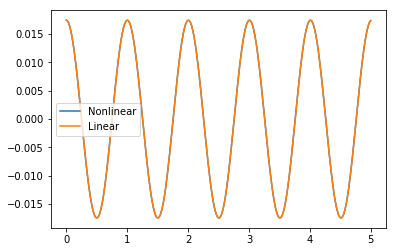

In [11]:
fig, ax = plt.subplots(1, 1)

ax.plot(non_lin_traj.index, non_lin_traj.angle)
ax.plot(lin_traj.index, lin_traj.angle)

ax.legend(['Nonlinear', 'Linear']);

**Exercise**

Create a function called `compare_lin_to_nonlin` that accepts a single angle value in degrees as the only argument and creates a plot just like the one you made above. Don't forget axis labels and a legend so that we can tell the two lines apart. Include the initial angle in the title of the plot. It should look something like:

```python
def compare_lin_to_nonlin(initial_angle):
    # write your code here (hint copy most of it from above and modify)
    fig, ax = plt.subplots(1, 1)
    ax.plot(non_lin_traj.index, np.rad2deg(non_lin_traj.angle))
    ax.plot(lin_traj.index, np.rad2deg(lin_traj.angle))
    # write the legend, labels, title, etc here
    ax.grid()
```

In [12]:
def compare_lin_to_nonlin(initial_angle):
    initial_angle = np.deg2rad(initial_angle)
    non_lin_sys.coordinates['angle'] = initial_angle
    lin_sys.coordinates['angle'] = initial_angle
    non_lin_traj = non_lin_sys.free_response(duration)
    lin_traj = lin_sys.free_response(duration)
    fig, ax = plt.subplots(1, 1)
    ax.plot(non_lin_traj.index, np.rad2deg(non_lin_traj.angle))
    ax.plot(lin_traj.index, np.rad2deg(lin_traj.angle))
    ax.legend(['Nonlinear', 'Linear'])
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Angle [deg]')
    ax.set_title('Initial angle: {:1.0f} deg'.format(np.rad2deg(initial_angle)))
    ax.grid()

In [13]:
# write your answer here

**Exercise**

Try out some angles from 0 to 180 degrees and view the graphs to see if there is anything interesting.

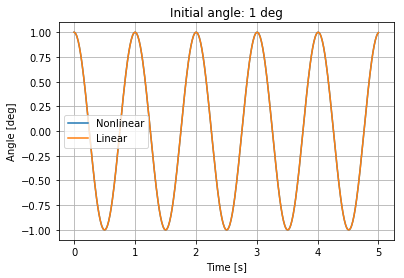

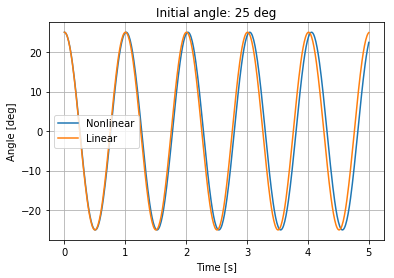

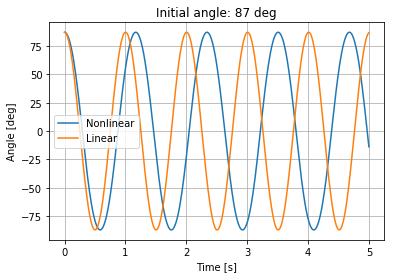

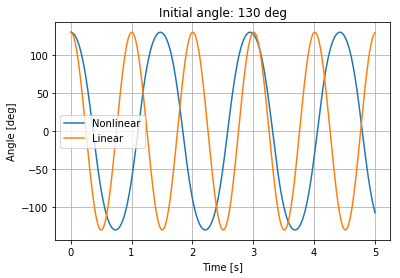

In [14]:
compare_lin_to_nonlin(1)
compare_lin_to_nonlin(25)
compare_lin_to_nonlin(87)
compare_lin_to_nonlin(130)

In [15]:
# write your answer here

**Exercise**

Make a plot of initial angle versus period for the nonlinear pendulum. Report on your what you learn from this plot. The code should look something like:

```python
periods = []
angles = np.deg2rad(np.linspace(0, 90))
for angle in angles:
    # fill in the loop here
    
fig, ax = plt.subplots(1, 1)
ax.plot(np.rad2deg(angles), periods)
ax.set_ylabel('Period [s]')
ax.set_xlabel('Initial Angle [deg]')
```

/home/travis/miniconda3/envs/resonance-dev/lib/python3.6/site-packages/resonance-0.14.0.dev0-py3.6.egg/resonance/functions.py:22: RuntimeWarning: Mean of empty slice.
/home/travis/miniconda3/envs/resonance-dev/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5,0,'Initial Angle [deg]')

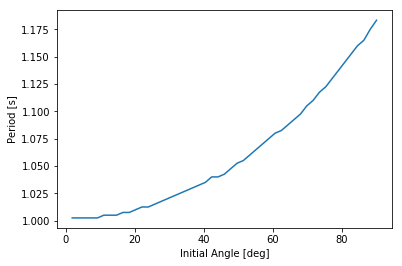

In [16]:
from resonance.functions import estimate_period
periods = []
angles = np.deg2rad(np.linspace(0, 90))
for angle in angles:
    non_lin_sys.coordinates['angle'] = angle
    traj = non_lin_sys.free_response(5.0)
    periods.append(estimate_period(traj.index, traj.angle))
    
fig, ax = plt.subplots(1, 1)
ax.plot(np.rad2deg(angles), periods)
ax.set_ylabel('Period [s]')
ax.set_xlabel('Initial Angle [deg]')

In [17]:
# write your answer here

# Adding Damping

Below we add a small amount of viscous damping to the linear pendulum and a small amount of Coulomb friction to the nonlinear pendulum. If you compare the trajectories of the angle at an initial angle of 5 degrees you see some differences.

In [18]:
lin_sys.constants['viscous_damping'] = 0.1  # Ns/m
non_lin_sys.constants['coeff_of_friction'] = 0.1  # Nm

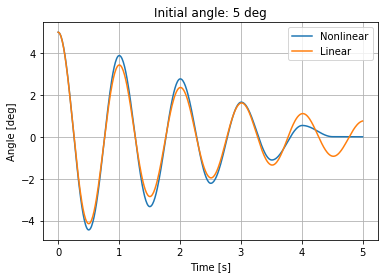

In [19]:
compare_lin_to_nonlin(5.0)

# Curve Fitting an Exponential Decay Function

In [20]:
non_lin_traj = non_lin_sys.free_response(5.0, sample_rate=500)

In [21]:
from scipy.optimize import curve_fit

**Exercise**

Use your curve fitting function for $\theta(t) = A e^{\lambda t} \cos(\omega t + \phi)$ and see how well it fits the nonlinear trajectory.

```python
def exp_decayed_oscillation(times, amplitude, decay_constant, frequency, phase_shift):
    # write your function here and return the answer
```

In [22]:
def exp_decayed_oscillation(times, amplitude, decay_constant, frequency, phase_shift):
    return amplitude * np.exp(decay_constant * times) * np.cos(frequency * times + phase_shift)

In [23]:
# write your answer here

Since there is something funny going on at the end of the simulation, only fit to the first 3 seconds of data.

In [24]:
popt, pcov = curve_fit(exp_decayed_oscillation,
                       non_lin_traj[:3.0].index, non_lin_traj[:3.0].angle,
                       p0=(5.0, -0.001, 2 * np.pi, 0.0))

Text(0,0.5,'Angle [rad]')

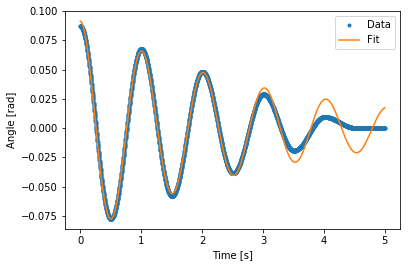

In [25]:
fig, ax = plt.subplots(1, 1)
ax.plot(non_lin_traj.index, non_lin_traj.angle, '.')
best_fit_angle = exp_decayed_oscillation(non_lin_traj.index, popt[0], popt[1], popt[2], popt[3])
ax.plot(non_lin_traj.index, best_fit_angle)
ax.legend(['Data', 'Fit'])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [rad]')

**Exercise**

Now try a function that looks like:

$$ \theta(t) = (m t + A) \cos(\omega t + \phi) $$

This is a linear decaying function instead of an exponentially decaying function.

```python
def lin_decayed_oscillation(times, m, A, frequency, phi):
    # write function here and return result
```

In [26]:
def lin_decayed_oscillation(times, m, A, frequency, phi):
    return (m * times + A) * np.cos(frequency * times + phi)

In [27]:
# write your answer here

In [28]:
popt, pcov = curve_fit(lin_decayed_oscillation,
                       non_lin_traj[:3.0].index, non_lin_traj[:3.0].angle,
                       p0=(-0.1, 0.07, 2 * np.pi, 0.0))

Text(0,0.5,'Angle [rad]')

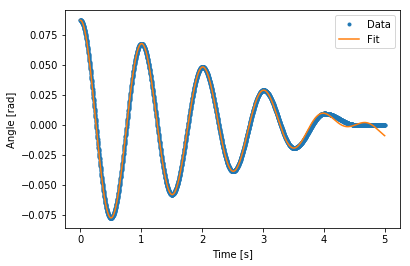

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(non_lin_traj.index, non_lin_traj.angle, '.')
best_fit_angle = lin_decayed_oscillation(non_lin_traj.index, popt[0], popt[1], popt[2], popt[3])
ax.plot(non_lin_traj.index, best_fit_angle)
ax.legend(['Data', 'Fit'])
ax.set_xlabel('Time [s]')
ax.set_ylabel('Angle [rad]')

# Investigate the stick-slip area

Notice that there is a point in time where the pendulum stops oscillating. At this point the pendulum does not have enough kinetic energy to overcome the friction. We can look more closely at this by simulating at a higher sample rate.

**Exercise**

Add a measurement to the system that computes the friction torque based on the defintion at the beginning of the notebook. Assume that $T_N=1$ Newton-meter, $\mu=0.2$, and $\theta_0=2.0$ deg. Simulate the system and plot the angle, angular velocity, and friction torque in 3 subplots that share the same X axis (time).

In [30]:
def calculate_friction(coeff_of_friction, angle_vel):
    return -coeff_of_friction * np.sign(angle_vel)
non_lin_sys.add_measurement('friction', calculate_friction)

In [31]:
non_lin_sys.constants['coeff_of_friction'] = 0.2  # Nm
non_lin_sys.coordinates['angle'] = np.deg2rad(2.0)
non_lin_traj = non_lin_sys.free_response(2.0, sample_rate=5000)

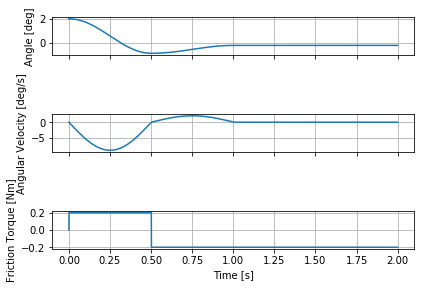

In [32]:
fig, axes = plt.subplots(3, 1, sharex=True)

axes[0].plot(non_lin_traj.index,
        np.rad2deg(non_lin_traj.angle))
axes[0].set_ylabel('Angle [deg]')
axes[0].grid()

axes[1].plot(non_lin_traj.index,
        np.rad2deg(non_lin_traj.angle_vel))
axes[1].set_ylabel('Angular Velocity [deg/s]')
axes[1].grid()

axes[2].plot(non_lin_traj.index,
             non_lin_traj.friction)
axes[2].set_ylabel('Friction Torque [Nm]')
axes[2].set_xlabel('Time [s]')
axes[2].grid()

plt.tight_layout()

In [33]:
non_lin_traj.tail()

,angle,angle_acc,angle_vel,bob_height,bob_sway,kinetic_energy,potential_energy,total_energy,friction
time,,,,,,,,,
1.9992,-0.003929,-0.227034,4.565106e-05,-0.279898,-0.0011,1.093158e-11,0.000003,0.000003,-0.2
1.9994,-0.003929,-0.227034,2.442693e-07,-0.279898,-0.0011,3.129819e-16,0.000003,0.000003,-0.2
1.9996,-0.003929,-0.227034,3.109426e-05,-0.279898,-0.0011,5.071563e-12,0.000003,0.000003,-0.2
1.9998,-0.003929,-0.227034,1.110638e-05,-0.279898,-0.0011,6.470325e-13,0.000003,0.000003,-0.2
2.0000,-0.003929,-0.227034,4.195634e-05,-0.279898,-0.0011,9.233718e-12,0.000003,0.000003,-0.2


In [34]:
np.rad2deg(non_lin_traj.angle).tail()

time
1.9992   -0.225111
1.9994   -0.225111
1.9996   -0.225111
1.9998   -0.225111
2.0000   -0.225111
Name: angle, dtype: float64

# Visualization

Finally, visualize the animation with different friction coefficients to see the behavior.

In [35]:
non_lin_sys.coordinates['angle'] = np.deg2rad(5.0)
non_lin_traj = non_lin_sys.free_response(4.0, sample_rate=100)

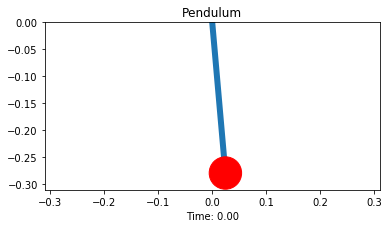

In [36]:
ani = non_lin_sys.animate_configuration(interval=1000/100)  # interval should be in milliseconds

In [37]:
from IPython.display import HTML, display

In [38]:
html = ani.to_jshtml()

In [39]:
display(HTML(html))